In [350]:
# Load libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

### Read Data

In [351]:
data = pd.read_csv("train.csv")

print('Dataframe Shape: ', data.shape); print('-'*80, '\n');
print("Dataframe Info: \n"); data.info(verbose=True); print('-'*80, '\n')
data.head(5)

Dataframe Shape:  (69999, 172)
-------------------------------------------------------------------------------- 

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float6

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

### Data Analysis

### Identify columns that have no variance

In [352]:
data_unique_count = data.nunique().sort_values(ascending=False)

# Find columns with all NULL entries
data_unique_count_is_zero = data_unique_count[data_unique_count == 0]
print(data_unique_count_is_zero.count())

0


In [353]:
# Find columns with all same entries
data_unique_count_is_one = data_unique_count[data_unique_count == 1]
print(data_unique_count_is_one.count())

13


In [354]:
data_unique_count_is_one

std_ic_t2o_mou_8        1
std_ic_t2o_mou_7        1
circle_id               1
std_og_t2c_mou_8        1
std_og_t2c_mou_7        1
std_og_t2c_mou_6        1
last_date_of_month_8    1
last_date_of_month_7    1
last_date_of_month_6    1
loc_ic_t2o_mou          1
std_og_t2o_mou          1
loc_og_t2o_mou          1
std_ic_t2o_mou_6        1
dtype: int64

In [355]:
### Drop columns with single value in all rows

drop_no_varience_columns = list(data_unique_count_is_one.index)
data.drop(drop_no_varience_columns, axis=1, inplace=True)

In [356]:
data.shape

(69999, 159)

### Check for Missing values

In [357]:
# Check how many rows have all missing values
print("Rows with all NULL values =",  data.isnull().all(axis=1).sum())

Rows with all NULL values = 0


In [358]:
def getMissingValues(missingCutoff):
    # Function to retun the columns with more than missingCutoff% missing values.
    missing = round(100*(data.isnull().sum()/data.shape[0]))
    print("There are {} features having more than {}% missing values/entries".format(len(missing.loc[missing > missingCutoff]),missingCutoff))
    return missing.loc[missing > missingCutoff]

In [359]:
def imputeNan(data, imputeColList=False, missingColList=False):
    # Function impute the nan with 0
    if imputeColList:
        for col in [y + s for s in ['_6','_7','_8'] for y in imputeColList]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in missingColList:
            data[col].fillna(0, inplace=True)

In [360]:
# Missing values per column expressed as % of total number of values
getMissingValues(50)

There are 30 features having more than 50% missing values/entries


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8                   74.0
night_pck_user_6            75.0
night_pck_user_7            74.0
night_pck_user_8            74.0
fb_user_6                   75.0
fb_user_7                   74.0
fb_user_8                   74.0
dtype: flo

In [361]:
# Out the the above listed features, many are required and are essential for analysis. 
# We can choose to impute these values with 0 to make enable these features to give value to analysis.

imputeCol = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user', 'date_of_last_rech_data']
imputeNan(data, imputeCol)

In [362]:
getMissingValues(50)

There are 0 features having more than 50% missing values/entries


Series([], dtype: float64)

In [363]:
getMissingValues(0)

There are 84 features having more than 0% missing values/entries


onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
offnet_mou_8           5.0
roam_ic_mou_6          4.0
roam_ic_mou_7          4.0
roam_ic_mou_8          5.0
roam_og_mou_6          4.0
roam_og_mou_7          4.0
roam_og_mou_8          5.0
loc_og_t2t_mou_6       4.0
loc_og_t2t_mou_7       4.0
loc_og_t2t_mou_8       5.0
loc_og_t2m_mou_6       4.0
loc_og_t2m_mou_7       4.0
loc_og_t2m_mou_8       5.0
loc_og_t2f_mou_6       4.0
loc_og_t2f_mou_7       4.0
loc_og_t2f_mou_8       5.0
loc_og_t2c_mou_6       4.0
loc_og_t2c_mou_7       4.0
loc_og_t2c_mou_8       5.0
loc_og_mou_6           4.0
loc_og_mou_7           4.0
loc_og_mou_8           5.0
std_og_t2t_mou_6       4.0
std_og_t2t_mou_7       4.0
std_og_t2t_mou_8       5.0
std_og_t2m_mou_6       4.0
std_og_t2m_mou_7       4.0
std_og_t2m_mou_8       5.0
std_og_t2f_mou_6       4.0
std_og_t2f_mou_7       4.0
std_og_t2f_mou_8       5.0
std_og_mou_6           4.0
s

In [364]:
imputeCol = ['onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou',
             'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou',
             'spl_og_mou', 'og_others', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou',
             'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'date_of_last_rech']
imputeNan(data, imputeCol)

In [365]:
getMissingValues(0)

There are 0 features having more than 0% missing values/entries


Series([], dtype: float64)

In [366]:
data.shape

(69999, 159)

In [367]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 159 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    arpu_6                    float64
 2    arpu_7                    float64
 3    arpu_8                    float64
 4    onnet_mou_6               float64
 5    onnet_mou_7               float64
 6    onnet_mou_8               float64
 7    offnet_mou_6              float64
 8    offnet_mou_7              float64
 9    offnet_mou_8              float64
 10   roam_ic_mou_6             float64
 11   roam_ic_mou_7             float64
 12   roam_ic_mou_8             float64
 13   roam_og_mou_6             float64
 14   roam_og_mou_7             float64
 15   roam_og_mou_8             float64
 16   loc_og_t2t_mou_6          float64
 17   loc_og_t2t_mou_7          float64
 18   loc_og_t2t_mou_8          float64
 19   loc_og_t2m_mou_6          float64
 20   loc_

In [368]:
date_vars = ["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8", 
             "date_of_last_rech_data_6", "date_of_last_rech_data_7", "date_of_last_rech_data_8"]

data.drop(date_vars, axis=1, inplace=True)

## Modelling Start

In [369]:
X = data[data.columns[~data.columns.isin(['churn_probability'])]]
Y = data['churn_probability']

In [370]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [371]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_std,Y, train_size=0.7,test_size=0.3,random_state=42)

In [372]:
print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

Training dataset size (48999, 152)
Training dataset target size (48999,)
Test dataset size (21000, 152)
Test dataset target size (21000,)


In [373]:
print("Data imbalance, counts of label '1': {}".format(sum(y_train==1)))
print("Data imbalance, counts of label '0': {} \n".format(sum(y_train==0)))

Data imbalance, counts of label '1': 4977
Data imbalance, counts of label '0': 44022 



### Using SMOTE to correct data imbalance

In [374]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote= sm.fit_sample(X_train, y_train)

print('After update, the shape of train_X: {}'.format(X_train_smote.shape))
print('After update, the shape of train_y: {} \n'.format(y_train_smote.shape))

print("After update, counts of label '1': {}".format(sum(y_train_smote==1)))
print("After update, counts of label '0': {}".format(sum(y_train_smote==0)))

After update, the shape of train_X: (88044, 152)
After update, the shape of train_y: (88044,) 

After update, counts of label '1': 44022
After update, counts of label '0': 44022


## PCA Start

In [375]:
# PCA object with default parameter
pca = PCA(random_state=42)

In [376]:
#Doing PCA on the train data
pca.fit(X_train_smote)

PCA(random_state=42)

In [377]:
print(pca.components_)
print('-'*80, '\n');
print(pca.explained_variance_ratio_)
print('-'*80, '\n');
print(pca.explained_variance_ratio_.cumsum())

[[ 1.73186431e-03  1.67291247e-01  1.76065371e-01 ...  7.85118901e-02
   8.24955180e-02  7.97265280e-02]
 [ 3.31156436e-03 -7.48749821e-02 -6.77586010e-02 ...  9.09822962e-02
   1.02650837e-01  1.04685056e-01]
 [ 3.35037318e-03 -4.39119073e-02 -2.83177944e-02 ... -9.94318322e-03
  -1.70168439e-02 -2.03589444e-02]
 ...
 [-0.00000000e+00  2.99148678e-16  3.39044447e-16 ...  8.61551651e-17
  -1.15895292e-17  7.23396447e-17]
 [ 0.00000000e+00  2.22590457e-16 -3.92646954e-16 ...  3.04601166e-17
   4.40928335e-18  8.85048727e-18]
 [ 0.00000000e+00 -5.17292053e-16  9.38874084e-16 ...  8.49091539e-18
  -8.47373069e-18 -4.84531670e-17]]
-------------------------------------------------------------------------------- 

[1.21638530e-01 9.22898378e-02 6.01842160e-02 4.67972811e-02
 3.78006484e-02 3.37457074e-02 3.08312157e-02 3.02593882e-02
 2.50646990e-02 2.21334547e-02 2.11005145e-02 1.81643175e-02
 1.80221815e-02 1.67056331e-02 1.48346110e-02 1.45169607e-02
 1.44302881e-02 1.39284731e-02 1.3059

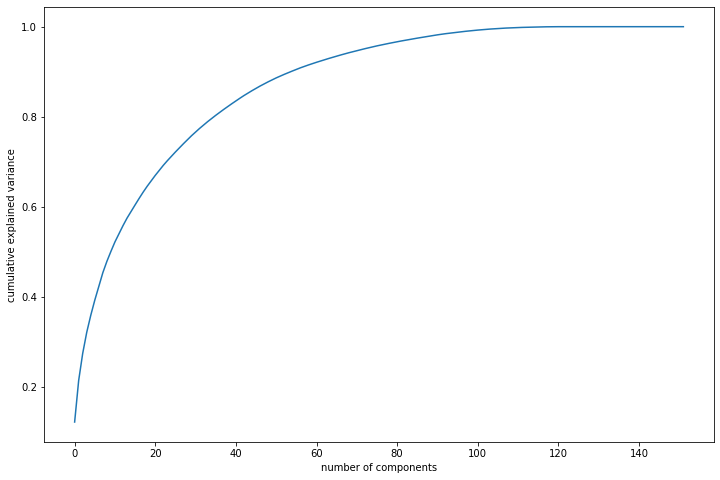

In [378]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [379]:
#pick the number of components explaining max variance
pca_X= PCA(n_components=70)

df_train_pca_X = pca_X.fit_transform(X_train_smote)
print(df_train_pca_X.shape)
df_test_pca_X = pca_X.transform(X_test)
print(df_test_pca_X.shape)

(88044, 70)
(21000, 70)


## Logistic Regression with PCA data

In [380]:
#Run the model using the selected variables
LR = LogisticRegression(class_weight='balanced')
LR.fit(df_train_pca_X, y_train_smote)

LogisticRegression(class_weight='balanced')

In [381]:
#Predicted probabilities
y_pred_train = LR.predict(df_train_pca_X)

#Printing results
print("Train data results")
print('-'*80, '\n');
print("Accuracy Score:",accuracy_score(y_train_smote,y_pred_train))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_train_smote, y_pred_train))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_train_smote,y_pred_train))
print('-'*80, '\n');
print("roc_auc_score: {:2.2}".format(metrics.roc_auc_score(y_train_smote, y_pred_train)))

Train data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.8307437190495661
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82     44022
           1       0.81      0.87      0.84     44022

    accuracy                           0.83     88044
   macro avg       0.83      0.83      0.83     88044
weighted avg       0.83      0.83      0.83     88044

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[34950  9072]
 [ 5830 38192]]
-------------------------------------------------------------------------------- 

roc_auc_score: 0.83


In [382]:
#Predicted probabilities
y_pred_test = LR.predict(df_test_pca_X)

#Printing results
print("Test data results");
print('-'*80, '\n');
print("Accuracy Score:", accuracy_score(y_test,y_pred_test))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_test))
print('-'*80, '\n');
print("roc_auc_score: {:2.2}".format(metrics.roc_auc_score(y_test, y_pred_test)))

Test data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.7993809523809524
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.79      0.88     18845
           1       0.32      0.86      0.47      2155

    accuracy                           0.80     21000
   macro avg       0.65      0.83      0.67     21000
weighted avg       0.91      0.80      0.83     21000

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[14936  3909]
 [  304  1851]]
-------------------------------------------------------------------------------- 

roc_auc_score: 0.83


## Trying Random Forest without PCA Data - using SMOTE data

In [383]:
#Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

#fit
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced')

In [384]:
predictions_train = rfc.predict(X_train_smote)
print ("Train data results")
print('-'*80, '\n');
print("Accuracy Score:", accuracy_score(y_train_smote, predictions_train))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_train_smote, predictions_train))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_train_smote, predictions_train))

Train data results
-------------------------------------------------------------------------------- 

Accuracy Score: 1.0
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44022
           1       1.00      1.00      1.00     44022

    accuracy                           1.00     88044
   macro avg       1.00      1.00      1.00     88044
weighted avg       1.00      1.00      1.00     88044

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[44022     0]
 [    0 44022]]


In [385]:
print ("Test data results")
print('-'*80, '\n');
predictions_test = rfc.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, predictions_test))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_test, predictions_test))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_test))

Test data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.9285238095238095
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     18845
           1       0.63      0.75      0.68      2155

    accuracy                           0.93     21000
   macro avg       0.80      0.85      0.82     21000
weighted avg       0.94      0.93      0.93     21000

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[17874   971]
 [  530  1625]]


In [386]:
importances = rfc.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
RF_feature_importance.head(15)

,value,colName
0,0.085807,total_ic_mou_8
1,0.061083,loc_ic_mou_8
2,0.051256,loc_og_mou_8
3,0.050088,loc_ic_t2m_mou_8
4,0.044797,total_og_mou_8
5,0.042126,roam_og_mou_8
6,0.041530,roam_ic_mou_8
7,0.034616,loc_og_t2m_mou_8
8,0.032421,loc_ic_t2t_mou_8
9,0.026466,last_day_rch_amt_8


In [387]:
# # model with the best hyperparameters
rfc_updated = RandomForestClassifier(bootstrap=True,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             n_estimators=100,
                             class_weight='balanced')

#fit
rfc_updated.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=100,
                       min_samples_split=200)

In [388]:
predictions_train = rfc_updated.predict(X_train_smote)
print ("Train data results")
print('-'*80, '\n');
print("accuracy score:", accuracy_score(y_train_smote, predictions_train))
print('-'*80, '\n');
print("classification report:")
print(classification_report(y_train_smote, predictions_train))
print('-'*80, '\n');
print("confusion matrix:")
print(confusion_matrix(y_train_smote, predictions_train))

Train data results
-------------------------------------------------------------------------------- 

accuracy score: 0.9065126527645269
-------------------------------------------------------------------------------- 

classification report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     44022
           1       0.92      0.89      0.91     44022

    accuracy                           0.91     88044
   macro avg       0.91      0.91      0.91     88044
weighted avg       0.91      0.91      0.91     88044

-------------------------------------------------------------------------------- 

confusion matrix:
[[40509  3513]
 [ 4718 39304]]


In [389]:
print ("Test data results")
print('-'*80, '\n');
predictions_test = rfc_updated.predict(X_test)
print("accuracy score:", accuracy_score(y_test, predictions_test))
print('-'*80, '\n');
print("classification report:")
print(classification_report(y_test, predictions_test))
print('-'*80, '\n');
print("confusion matrix:")
print(confusion_matrix(y_test, predictions_test))

Test data results
-------------------------------------------------------------------------------- 

accuracy score: 0.9051904761904762
-------------------------------------------------------------------------------- 

classification report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.95     18845
           1       0.52      0.82      0.64      2155

    accuracy                           0.91     21000
   macro avg       0.75      0.87      0.79     21000
weighted avg       0.93      0.91      0.91     21000

-------------------------------------------------------------------------------- 

confusion matrix:
[[17243  1602]
 [  389  1766]]


In [390]:
importances = rfc_updated.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
RF_feature_importance.head(15)

,value,colName
0,0.087691,loc_og_mou_8
1,0.081473,loc_ic_mou_8
2,0.079616,total_ic_mou_8
3,0.066223,loc_ic_t2m_mou_8
4,0.064817,roam_og_mou_8
5,0.057777,loc_og_t2m_mou_8
6,0.045584,total_rech_amt_8
7,0.044527,roam_ic_mou_8
8,0.043386,loc_ic_t2t_mou_8
9,0.036564,total_og_mou_8


## Trying with XG Boost

In [391]:
from xgboost import XGBClassifier

#Running the random forest with default parameters.
xgb = XGBClassifier()

#fit
xgb.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [392]:
predictions_train = xgb.predict(X_train_smote)
print ("Train data results")
print('-'*80, '\n');
print("accuracy score:", accuracy_score(y_train_smote, predictions_train))
print('-'*80, '\n');
print("classification report:")
print(classification_report(y_train_smote, predictions_train))
print('-'*80, '\n');
print("confusion matrix:")
print(confusion_matrix(y_train_smote, predictions_train))

Train data results
-------------------------------------------------------------------------------- 

accuracy score: 0.9836218254509109
-------------------------------------------------------------------------------- 

classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     44022
           1       0.99      0.98      0.98     44022

    accuracy                           0.98     88044
   macro avg       0.98      0.98      0.98     88044
weighted avg       0.98      0.98      0.98     88044

-------------------------------------------------------------------------------- 

confusion matrix:
[[43377   645]
 [  797 43225]]


In [393]:
print ("Test data results")
print('-'*80, '\n');
predictions_test = rfc_updated.predict(X_test)
print("accuracy score:", accuracy_score(y_test, predictions_test))
print('-'*80, '\n');
print("classification report:")
print(classification_report(y_test, predictions_test))
print('-'*80, '\n');
print("confusion matrix:")
print(confusion_matrix(y_test, predictions_test))

Test data results
-------------------------------------------------------------------------------- 

accuracy score: 0.9051904761904762
-------------------------------------------------------------------------------- 

classification report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.95     18845
           1       0.52      0.82      0.64      2155

    accuracy                           0.91     21000
   macro avg       0.75      0.87      0.79     21000
weighted avg       0.93      0.91      0.91     21000

-------------------------------------------------------------------------------- 

confusion matrix:
[[17243  1602]
 [  389  1766]]


In [394]:
importances = xgb.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
RF_feature_importance.head(15)

,value,colName
0,0.162561,total_ic_mou_8
1,0.112189,loc_ic_mou_8
2,0.091944,fb_user_8
3,0.055394,roam_og_mou_8
4,0.020710,roam_ic_mou_8
5,0.020396,total_rech_num_8
6,0.020058,last_day_rch_amt_8
7,0.017161,spl_ic_mou_8
8,0.016005,total_rech_num_6
9,0.014889,total_rech_amt_8


### Evaluating Test Data

In [395]:
X_test.shape

(21000, 152)

In [396]:
test_data = pd.read_csv("test.csv")

print('Dataframe Shape: ', test_data.shape); print('-'*80, '\n');
test_data.head(5)

Dataframe Shape:  (30000, 171)
-------------------------------------------------------------------------------- 



,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [397]:
drop_no_varience_columns = list(data_unique_count_is_one.index)
test_data.drop(drop_no_varience_columns, axis=1, inplace=True)

test_data.shape

(30000, 158)

In [398]:
test_data.drop(date_vars, axis=1, inplace=True)
test_data.shape

(30000, 152)

In [399]:
missing_values = pd.DataFrame((test_data.isnull().sum()/len(test_data))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values.head(10)

,feature,Missing%
124,arpu_3g_6,74.716667
115,av_rech_amt_data_6,74.716667
106,max_rech_data_6,74.716667
127,arpu_2g_6,74.716667
109,count_rech_2g_6,74.716667
103,total_rech_data_6,74.716667
145,fb_user_6,74.716667
130,night_pck_user_6,74.716667
112,count_rech_3g_6,74.716667
104,total_rech_data_7,74.313333


In [400]:
def imputeTestNan(data, imputeColList=False, missingColList=False):
    # Function impute the nan with 0
    if imputeColList:
        for col in [y + s for s in ['_6','_7','_8'] for y in imputeColList]:
            test_data[col].fillna(0, inplace=True)
    else:    
        for col in missingColList:
            test_data[col].fillna(0, inplace=True)

In [401]:
imputeCol = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user', 
             'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou',
             'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou',
             'spl_og_mou', 'og_others', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou',
             'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others']
imputeTestNan(data, imputeCol)

In [402]:
predictions_test = rfc_updated.predict(test_data)

In [403]:
predictions_test

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [404]:
count_arr = np.bincount(predictions_test)
# Count occurrence of element '1' in numpy array
print('Total occurences of "1" in array: ', count_arr[1])
# Count occurrence of element '0' in numpy array
print('Total occurences of "0" in array: ', count_arr[0])

Total occurences of "1" in array:  3605
Total occurences of "0" in array:  26395


In [405]:
test_data.shape

(30000, 152)

In [406]:
solution_df = test_data[['id']].copy()

In [407]:
solution_df.insert(loc=1, column='churn_probability', value=predictions_test)

In [408]:
solution_df.head

<bound method NDFrame.head of           id  churn_probability
0      69999                  0
1      70000                  0
2      70001                  1
3      70002                  0
4      70003                  0
5      70004                  1
6      70005                  0
7      70006                  0
8      70007                  0
9      70008                  0
10     70009                  0
11     70010                  0
12     70011                  0
13     70012                  0
14     70013                  0
15     70014                  0
16     70015                  0
17     70016                  0
18     70017                  0
19     70018                  0
20     70019                  1
21     70020                  0
22     70021                  0
23     70022                  0
24     70023                  0
25     70024                  0
26     70025                  0
27     70026                  0
28     70027                  0
29     700

In [409]:
solution_df.to_csv('solution.csv', index=False)